## Setup the Environment

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

In [1]:
%cd yolov5
import torch
import utils
display = utils.notebook_init()

YOLOv5  v7.0-228-g4d687c8 Python-3.9.18 torch-2.1.0+cpu CPU


Setup complete  (4 CPUs, 15.9 GB RAM, 55.4/300.0 GB disk)


## Test the installation

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', force_reload=True, trust_repo=True)
img = 'F:\Photo\DSC_0309.jpg' # Give your image path
results = model(img)
results.print()

image 1/1: 1944x2592 2 persons, 2 backpacks
Speed: 63.4ms pre-process, 709.2ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)


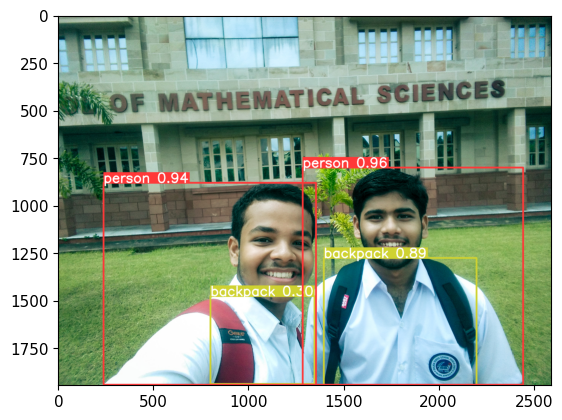

In [5]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

## Stream the video while predicting

In [7]:
vid = 'F:\Photo\VID_20210217_121626.mp4'
cap = cv2.VideoCapture(vid)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):  # press q to stop the stream
        break
cap.release()
cv2.destroyAllWindows()

## Save the annoted video

In [ ]:
vid = 'F:\Photo\VID_20210217_121626.mp4'  # give your input video file path
cap = cv2.VideoCapture(vid)
frame_width = int(cap.get(3)) 
frame_height = int(cap.get(4)) 
size = (frame_width, frame_height) 
vidCap = cv2.VideoWriter('Sraswati.avi', # Give your output file name
                         cv2.VideoWriter_fourcc(*'MJPG'), 
                         10, size) 
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break 
    results = model(frame)
    vidCap.write(np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Setup process of labelImg to for annotation of custom dataset images

In [6]:
%cd ..
!git clone https://github.com/HumanSignal/labelImg.git

Cloning into 'labelImg'...


In [7]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
     --------------------------------------- 0.0/50.1 MB 330.3 kB/s eta 0:02:32
     --------------------------------------- 0.1/50.1 MB 438.9 kB/s eta 0:01:54
     --------------------------------------- 0.1/50.1 MB 655.8 kB/s eta 0:01:17
     --------------------------------------- 0.1/50.1 MB 655.8 kB/s eta 0:01:17
     --------------------------------------- 0.2/50.1 MB 623.6 kB/s eta 0:01:20
     --------------------------------------- 0.3/50.1 MB 811.7 kB/s eta 0:01:02
     --------------------------------------- 0.3/50.1 MB 819.2 kB/s eta 0:01:01
     --------------------------------------- 0.4/50.1 MB 890.4 kB/s eta 0:00:56
     --------------------------------------- 0.5/50.1 MB 909.8 kB/s eta 0:00:55
     --------------------------------------- 0.5/50.1 MB 944.9 k

- Open conda prompt in your desiered environment
- go inside the `labelImg` folder
- run > python `labelImg.py`
- Set the image folder
- Set the target folder for labels
- Change the format to yolo
- Label all the Images using your custom classes and save them
- Move all the labels into the Images folder

## Steps for creating Dataset.yml file

- Create a `dataset.yml` file inside yolov5 folder

- Copy and paste the below text inside the file

- After performing all the steps the project structure will look like this

## Train the model

In [ ]:
%cd yolov5
!python train.py --img 340 --batch 16 --epochs 50 --data dataset.yml --weights yolov5x.pt

## Load your custom model

In [3]:
%cd ..
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)

f:\Programming\HelmetDetection


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Tanmoy/.cache\torch\hub\master.zip
YOLOv5  v7.0-228-g4d687c8 Python-3.9.18 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 322 layers, 86281078 parameters, 0 gradients, 204.1 GFLOPs
Adding AutoShape... 


## Test your model

In [7]:
vid = "NoHelmet.mp4"
cap = cv2.VideoCapture(vid)
frame_width = int(cap.get(3)) 
frame_height = int(cap.get(4)) 
size = (frame_width, frame_height) 
vidCap = cv2.VideoWriter('Sraswati.avi',
                         cv2.VideoWriter_fourcc(*'MJPG'), 
                         20, size) 
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame)
    vidCap.write(np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()